In [28]:
import tweepy
import yaml
import json
from datetime import datetime as dt, timedelta
import pickle
import sys
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
with open('credentials.yaml') as f:
    twitter_credentials = yaml.load(f, Loader=yaml.loader.SafeLoader)

api_key = twitter_credentials['API Key']
api_key_secret = twitter_credentials['Api Key Secret']
bearer_token = twitter_credentials['Bearer Token']


### V2

In [4]:
"""
# https://dev.to/twitterdev/a-comprehensive-guide-for-using-the-twitter-api-v2-using-tweepy-in-python-15d9
query = '#covid -is:retweet lang:es'
max_results = 10

# min_faves, min_retweets or place_country are not availables in my current subscription

tweets = client.search_recent_tweets(query=query,
                                     tweet_fields=['created_at', 'public_metrics'], # 'context_annotations', 'entities' too
                                     max_results=max_results)

for tweet in tweets.data:
    # print(tweet.text)
    # if len(tweet.context_annotations) > 0:
    #     print(tweet.context_annotations)
    if len(tweet.public_metrics) > 0:
        print(tweet.public_metrics)
"""

"\n# https://dev.to/twitterdev/a-comprehensive-guide-for-using-the-twitter-api-v2-using-tweepy-in-python-15d9\nquery = '#covid -is:retweet lang:es'\nmax_results = 10\n\n# min_faves, min_retweets or place_country are not availables in my current subscription\n\ntweets = client.search_recent_tweets(query=query,\n                                     tweet_fields=['created_at', 'public_metrics'], # 'context_annotations', 'entities' too\n                                     max_results=max_results)\n\nfor tweet in tweets.data:\n    # print(tweet.text)\n    # if len(tweet.context_annotations) > 0:\n    #     print(tweet.context_annotations)\n    if len(tweet.public_metrics) > 0:\n        print(tweet.public_metrics)\n"

### V1.1 Trending Topics

In [5]:

auth = tweepy.OAuth2BearerHandler(bearer_token)
api = tweepy.API(auth)

# https://developer.twitter.com/en/docs/twitter-api/v1/trends/locations-with-trending-topics/api-reference/get-trends-available
public_tweets = api.get_place_trends(id=23424950) # spain
print(public_tweets[0].keys())
print(len(public_tweets[0]['trends']))


dict_keys(['trends', 'as_of', 'created_at', 'locations'])
50


In [6]:
print(json.dumps(public_tweets, indent=4))

[
    {
        "trends": [
            {
                "name": "#BizumXtralifePokemon",
                "url": "http://twitter.com/search?q=%23BizumXtralifePokemon",
                "promoted_content": null,
                "query": "%23BizumXtralifePokemon",
                "tweet_volume": null
            },
            {
                "name": "Froil\u00e1n",
                "url": "http://twitter.com/search?q=Froil%C3%A1n",
                "promoted_content": null,
                "query": "Froil%C3%A1n",
                "tweet_volume": 24699
            },
            {
                "name": "#LaIslaDeLasTentaciones15",
                "url": "http://twitter.com/search?q=%23LaIslaDeLasTentaciones15",
                "promoted_content": null,
                "query": "%23LaIslaDeLasTentaciones15",
                "tweet_volume": null
            },
            {
                "name": "Feliz Navidad",
                "url": "http://twitter.com/search?q=%22Feliz+Navidad%22",


In [7]:
trends = public_tweets[0]['trends']
trends[0]

{'name': '#BizumXtralifePokemon',
 'url': 'http://twitter.com/search?q=%23BizumXtralifePokemon',
 'promoted_content': None,
 'query': '%23BizumXtralifePokemon',
 'tweet_volume': None}

In [8]:
for trend in public_tweets[0]['trends']:
    if not isinstance(trend['tweet_volume'], int):
        trend['tweet_volume'] = 0

sorted_trends = sorted(public_tweets[0]['trends'], key=lambda d: d['tweet_volume'], reverse=True)
sorted_trends

[{'name': 'Christmas',
  'url': 'http://twitter.com/search?q=Christmas',
  'promoted_content': None,
  'query': 'Christmas',
  'tweet_volume': 2172630},
 {'name': 'Arsenal',
  'url': 'http://twitter.com/search?q=Arsenal',
  'promoted_content': None,
  'query': 'Arsenal',
  'tweet_volume': 410608},
 {'name': 'Liverpool',
  'url': 'http://twitter.com/search?q=Liverpool',
  'promoted_content': None,
  'query': 'Liverpool',
  'tweet_volume': 279186},
 {'name': 'Gakpo',
  'url': 'http://twitter.com/search?q=Gakpo',
  'promoted_content': None,
  'query': 'Gakpo',
  'tweet_volume': 275441},
 {'name': 'El Gobierno',
  'url': 'http://twitter.com/search?q=%22El+Gobierno%22',
  'promoted_content': None,
  'query': '%22El+Gobierno%22',
  'tweet_volume': 223910},
 {'name': 'Feliz Navidad',
  'url': 'http://twitter.com/search?q=%22Feliz+Navidad%22',
  'promoted_content': None,
  'query': '%22Feliz+Navidad%22',
  'tweet_volume': 167090},
 {'name': 'Sara',
  'url': 'http://twitter.com/search?q=Sara',


In [9]:
max_value = 0
max_index = 0

for i, trend in enumerate(trends):
    if isinstance(trend['tweet_volume'], int) and trend['tweet_volume'] > max_value:
        max_value = trend['tweet_volume']
        max_index = i

print(max_value)
print(max_index)
trends[max_index]

2172630
25


{'name': 'Christmas',
 'url': 'http://twitter.com/search?q=Christmas',
 'promoted_content': None,
 'query': 'Christmas',
 'tweet_volume': 2172630}

In [10]:
trend_example = trends[15]
trend_example

{'name': 'Glass Onion',
 'url': 'http://twitter.com/search?q=%22Glass+Onion%22',
 'promoted_content': None,
 'query': '%22Glass+Onion%22',
 'tweet_volume': 80976}

In [11]:
client = tweepy.Client(bearer_token=bearer_token)

In [12]:
# https://dev.to/twitterdev/a-comprehensive-guide-for-using-the-twitter-api-v2-using-tweepy-in-python-15d9
query = trend_example['name'] + ' is:verified -is:retweet lang:es' # min_faves, min_retweets or place_country
print(query)
max_results = 10

dtformat = '%Y-%m-%dT%H:%M:%SZ'
start_time = (dt.utcnow() - timedelta(hours=24)).strftime(dtformat)
print(start_time)

# min_faves, min_retweets or place_country are not availables in my current subscription

tweets = client.search_recent_tweets(query=query,
                                     tweet_fields=['created_at', 'public_metrics', 'entities', 'context_annotations'],
                                     user_fields=['username', 'name'],
                                     expansions=['entities.mentions.username', 'author_id'],
                                     max_results=max_results,
                                     sort_order='relevancy',
                                     start_time=start_time)
                                     # start_time, to get tweets since last 24 hours


Glass Onion is:verified -is:retweet lang:es
2022-12-26T14:56:48Z


In [13]:
tweets

Response(data=[<Tweet id=1607406009273782272 text="Solo un grupo de vacacionistas, ocultando secretos y tal vez cometiendo un asesinato. 🧐 'Glass Onion: Un misterio de Knives Out', ya disponible. https://t.co/17PAJHg3d7">, <Tweet id=1607398205700059139 text='qué mala glass onion, mediocre, muy por detrás de la primera. qué despropósito'>, <Tweet id=1607517259550887937 text='Una isla, un misterio, un detective, múltiples sospechosos. Vuelve Benoit Blanc. Glass Onion, ya disponible, solo en Netflix.'>, <Tweet id=1607517259253030914 text='Benoit Blanc deberá resolver un misterio que envuelve a un nuevo grupo de sospechosos. Glass Onion, ya disponible, solo en Netflix.'>, <Tweet id=1607517259244740608 text='Todos son sospechosos en este nuevo rompecabezas de Rian Johnson. Glass Onion, un misterio de Knives Out, sólo en Netflix.'>, <Tweet id=1607417655295606789 text='Con el metraje que le sobra a Glass Onion me he hecho una bufanda.'>, <Tweet id=1607547928645718017 text='Vaya pestiño horren

In [14]:
tweets.includes

{'users': [<User id=231577324 name=Netflix Latinoamérica username=NetflixLAT>,
  <User id=204406798 name=rush username=rushsmith>,
  <User id=127823139 name=Dani Cantó ⚑ username=Dani_Canto>,
  <User id=92415862 name=Rosa Montero username=BrunaHusky>,
  <User id=774588164 name=SopitasFM username=sopitasfm>,
  <User id=18144514 name=Espinof username=espinof_com>,
  <User id=76664119 name=Vanguardia username=vanguardiacom>]}

In [15]:
tweet_data = tweets.data[0]
tweet_user_info = tweets.includes['users'][0]
print(tweet_data)
tweet_user_info

Solo un grupo de vacacionistas, ocultando secretos y tal vez cometiendo un asesinato. 🧐 'Glass Onion: Un misterio de Knives Out', ya disponible. https://t.co/17PAJHg3d7


<User id=231577324 name=Netflix Latinoamérica username=NetflixLAT>

In [16]:
# check fields
print(tweet_data.text)
print(tweet_data.created_at)
print(tweet_data.id)
print(f'https://twitter.com/twitter/statuses/{tweet_data.id}')
print(tweet_user_info.username)
print(tweet_user_info.name)
print(tweet_data.public_metrics)

Solo un grupo de vacacionistas, ocultando secretos y tal vez cometiendo un asesinato. 🧐 'Glass Onion: Un misterio de Knives Out', ya disponible. https://t.co/17PAJHg3d7
2022-12-26 16:00:31+00:00
1607406009273782272
https://twitter.com/twitter/statuses/1607406009273782272
NetflixLAT
Netflix Latinoamérica
{'retweet_count': 33, 'reply_count': 21, 'like_count': 1061, 'quote_count': 19}


In [17]:
print(list(tweet_data.entities.keys()))
print(tweet_data.entities)

['urls', 'annotations']
{'urls': [{'start': 145, 'end': 168, 'url': 'https://t.co/17PAJHg3d7', 'expanded_url': 'https://twitter.com/NetflixLAT/status/1607406009273782272/photo/1', 'display_url': 'pic.twitter.com/17PAJHg3d7', 'media_key': '3_1607385576096911360'}], 'annotations': [{'start': 89, 'end': 115, 'probability': 0.8605, 'type': 'Other', 'normalized_text': 'Glass Onion: Un misterio de'}, {'start': 117, 'end': 126, 'probability': 0.8421, 'type': 'Other', 'normalized_text': 'Knives Out'}]}


In [18]:
# get from entities "normalized_text" from "annotations" field

In [19]:
tweet_data.context_annotations

[{'domain': {'id': '23',
   'name': 'TV Channels',
   'description': 'Television Channels'},
  'entity': {'id': '1278096025752702976', 'name': 'Netflix Latinoamérica'}},
 {'domain': {'id': '45',
   'name': 'Brand Vertical',
   'description': 'Top level entities that describe a Brands industry'},
  'entity': {'id': '781974597310615553', 'name': 'Entertainment'}},
 {'domain': {'id': '30',
   'name': 'Entities [Entity Service]',
   'description': 'Entity Service top level domain, every item that is in Entity Service should be in this domain'},
  'entity': {'id': '781974597105094656',
   'name': 'TV/Movies Related - Entertainment'}},
 {'domain': {'id': '47',
   'name': 'Brand',
   'description': 'Brands and Companies'},
  'entity': {'id': '10026367762', 'name': 'Netflix'}},
 {'domain': {'id': '131',
   'name': 'Unified Twitter Taxonomy',
   'description': 'A taxonomy of user interests. '},
  'entity': {'id': '10026367762', 'name': 'Netflix'}},
 {'domain': {'id': '131',
   'name': 'Unified 

In [35]:
context_annotations_values = [annotation['entity']['name'] for annotation in tweet_data.context_annotations]
context_annotations_values

['Netflix Latinoamérica',
 'Entertainment',
 'TV/Movies Related - Entertainment',
 'Netflix',
 'Netflix',
 'Entertainment industry',
 'TV streaming services']

In [27]:
entities_values = [entity['normalized_text'] for entity in tweet_data.entities['annotations']]
entities_values

['Glass Onion: Un misterio de', 'Knives Out']

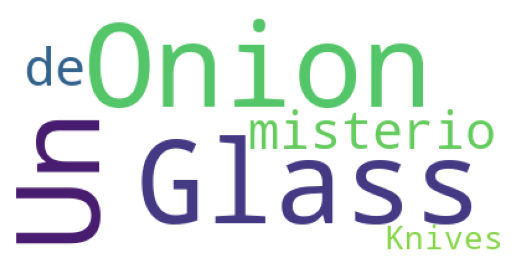

In [31]:
wordcloud = WordCloud(background_color = "white", max_words = 20).generate(" ".join(entities_values))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

In [21]:
# export top 10 tweets for top 10 trending topics, to save requests 

In [22]:
top_trends = sorted_trends[:10]
# remove last and add "pechotes" social new
top_trends = top_trends[:-1]
top_trends.append(sorted_trends[36])

In [23]:
top_trends

[{'name': 'Christmas',
  'url': 'http://twitter.com/search?q=Christmas',
  'promoted_content': None,
  'query': 'Christmas',
  'tweet_volume': 2172630},
 {'name': 'Arsenal',
  'url': 'http://twitter.com/search?q=Arsenal',
  'promoted_content': None,
  'query': 'Arsenal',
  'tweet_volume': 410608},
 {'name': 'Liverpool',
  'url': 'http://twitter.com/search?q=Liverpool',
  'promoted_content': None,
  'query': 'Liverpool',
  'tweet_volume': 279186},
 {'name': 'Gakpo',
  'url': 'http://twitter.com/search?q=Gakpo',
  'promoted_content': None,
  'query': 'Gakpo',
  'tweet_volume': 275441},
 {'name': 'El Gobierno',
  'url': 'http://twitter.com/search?q=%22El+Gobierno%22',
  'promoted_content': None,
  'query': '%22El+Gobierno%22',
  'tweet_volume': 223910},
 {'name': 'Feliz Navidad',
  'url': 'http://twitter.com/search?q=%22Feliz+Navidad%22',
  'promoted_content': None,
  'query': '%22Feliz+Navidad%22',
  'tweet_volume': 167090},
 {'name': 'Sara',
  'url': 'http://twitter.com/search?q=Sara',


In [24]:
trend_tweets = {}
for trend in top_trends:
    query = trend['name'] + ' is:verified -is:retweet lang:es' # min_faves, min_retweets or place_country
    print(query)
    max_results = 10

    dtformat = '%Y-%m-%dT%H:%M:%SZ'
    start_time = (dt.utcnow() - timedelta(hours=24)).strftime(dtformat)
    print(start_time)

    # min_faves, min_retweets or place_country are not availables in my current subscription

    tweets = client.search_recent_tweets(query=query,
                                        tweet_fields=['created_at', 'public_metrics', 'entities', 'context_annotations'],
                                        user_fields=['username', 'name'],
                                        expansions=['entities.mentions.username', 'author_id'],
                                        max_results=max_results,
                                        sort_order='relevancy',
                                        start_time=start_time)
    trend_tweets[trend['name']] = tweets

Christmas is:verified -is:retweet lang:es
2022-12-26T14:56:59Z
Arsenal is:verified -is:retweet lang:es
2022-12-26T14:57:00Z
Liverpool is:verified -is:retweet lang:es
2022-12-26T14:57:00Z
Gakpo is:verified -is:retweet lang:es
2022-12-26T14:57:01Z
El Gobierno is:verified -is:retweet lang:es
2022-12-26T14:57:01Z
Feliz Navidad is:verified -is:retweet lang:es
2022-12-26T14:57:02Z
Sara is:verified -is:retweet lang:es
2022-12-26T14:57:02Z
Glass Onion is:verified -is:retweet lang:es
2022-12-26T14:57:02Z
Joao is:verified -is:retweet lang:es
2022-12-26T14:57:03Z
Mateu Lahoz is:verified -is:retweet lang:es
2022-12-26T14:57:03Z


In [25]:
type(trend_tweets)

list

In [26]:
# pickle.dump(trend_tweets, open('trend_tweets.pkl', 'wb'))
# not works load